In [ ]:
import pandas as pd
b_cancer=pd.read_csv("/content/sample_data/data.csv")
b_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
b_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# remove the 'Unnamed: 32' column  #becoz no use
b_cancer= b_cancer.drop('Unnamed: 32', axis=1)

In [ ]:
# check the data type of each column
b_cancer.dtypes

,0
id,int64
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64


<ipython-input-5-0e42568f31f8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(b_cancer['diagnosis'], palette='RdBu')


Number of cells labeled Benign:  357
Number of cells labeled Malignant :  212

% of cells labeled Benign 62.74 %
% of cells labeled Malignant 37.26 %


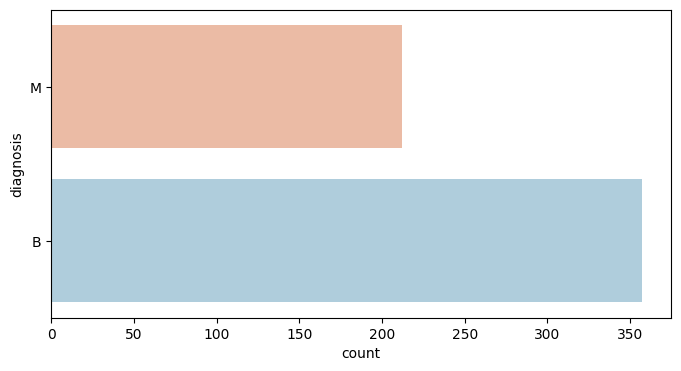

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns # Import the Seaborn

# visualize distribution of classes
plt.figure(figsize=(8, 4))
sns.countplot(b_cancer['diagnosis'], palette='RdBu')

# count number of obvs in each class
benign, malignant = b_cancer['diagnosis'].value_counts()
print('Number of cells labeled Benign: ', benign)
print('Number of cells labeled Malignant : ', malignant)
print('')
print('% of cells labeled Benign', round(benign / len(b_cancer) * 100, 2), '%')
print('% of cells labeled Malignant', round(malignant / len(b_cancer) * 100, 2), '%')

**for finding clusters , instances, correlation,mean,outliers,pattern and trends.**

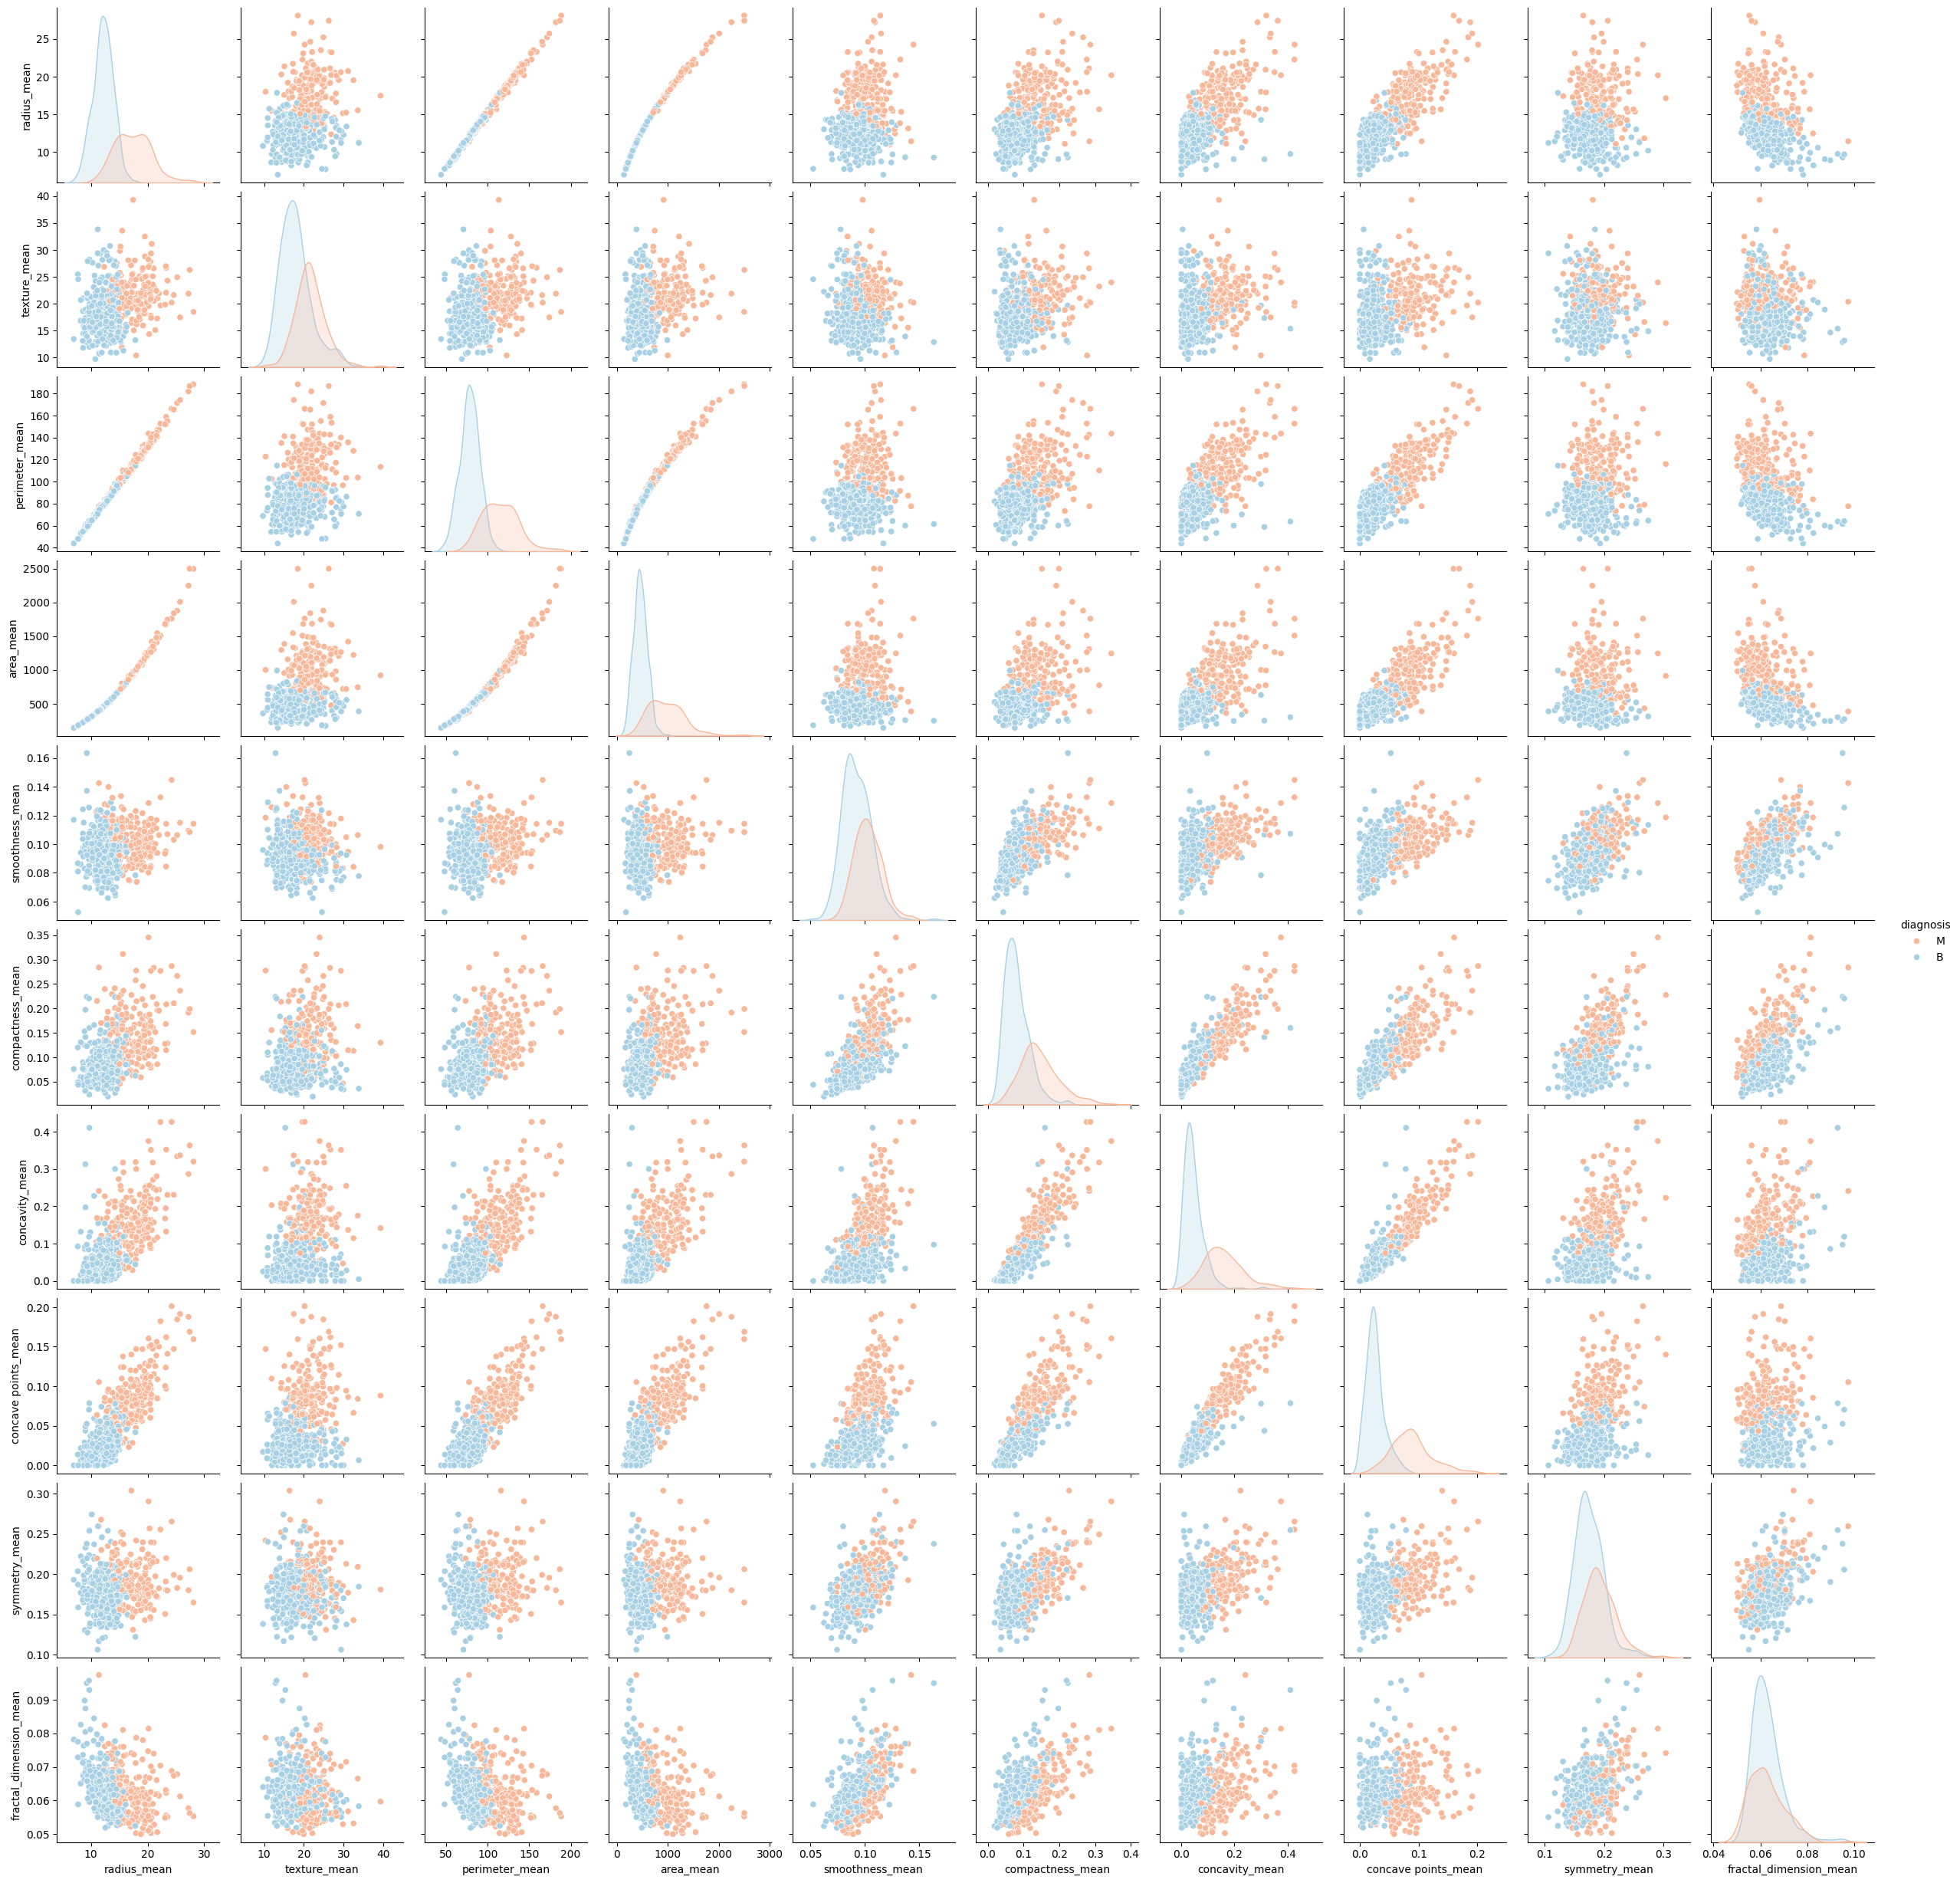

In [ ]:
# generate a scatter plot matrix with the "mean" columns
cols = ['diagnosis',
        'radius_mean',
        'texture_mean',
        'perimeter_mean',
        'area_mean',
        'smoothness_mean',
        'compactness_mean',
        'concavity_mean',
        'concave points_mean',
        'symmetry_mean',
        'fractal_dimension_mean']

sns.pairplot(data=b_cancer[cols], hue='diagnosis', palette='RdBu')

In [ ]:
# import dependencies
# data cleaning and manipulation
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
from sklearn.preprocessing import StandardScaler

import sklearn.linear_model as skl_lm
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split


import statsmodels.api as sm
import statsmodels.formula.api as smf


# initialize some package settings
sns.set(style="whitegrid", color_codes=True, font_scale=1.3)

%matplotlib inline

1. sns.pairplot()-creates a grid of scatter plots for each pair of features in the dataset.
2. b_cancer[cols] extracts only the columns listed in cols from the b_cancer DataFrame.
3. hue='diagnosis': Adds color-coding to the plots based on the diagnosis column.
4. palette='RdBu': Specifies the color palette to be used. RdBu is a red-blue color palette where one color represents one diagnosis (e.g., red for malignant and blue for benign).

In [ ]:

# Generate and visualize the correlation matrix
corr = b_cancer.corr().round(2)

# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(20, 20))

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

<ipython-input-51-4da9a143e69f>:5: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  mask = np.zeros_like(corr, dtype=np.bool)


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

**error that 's  why i have convert**


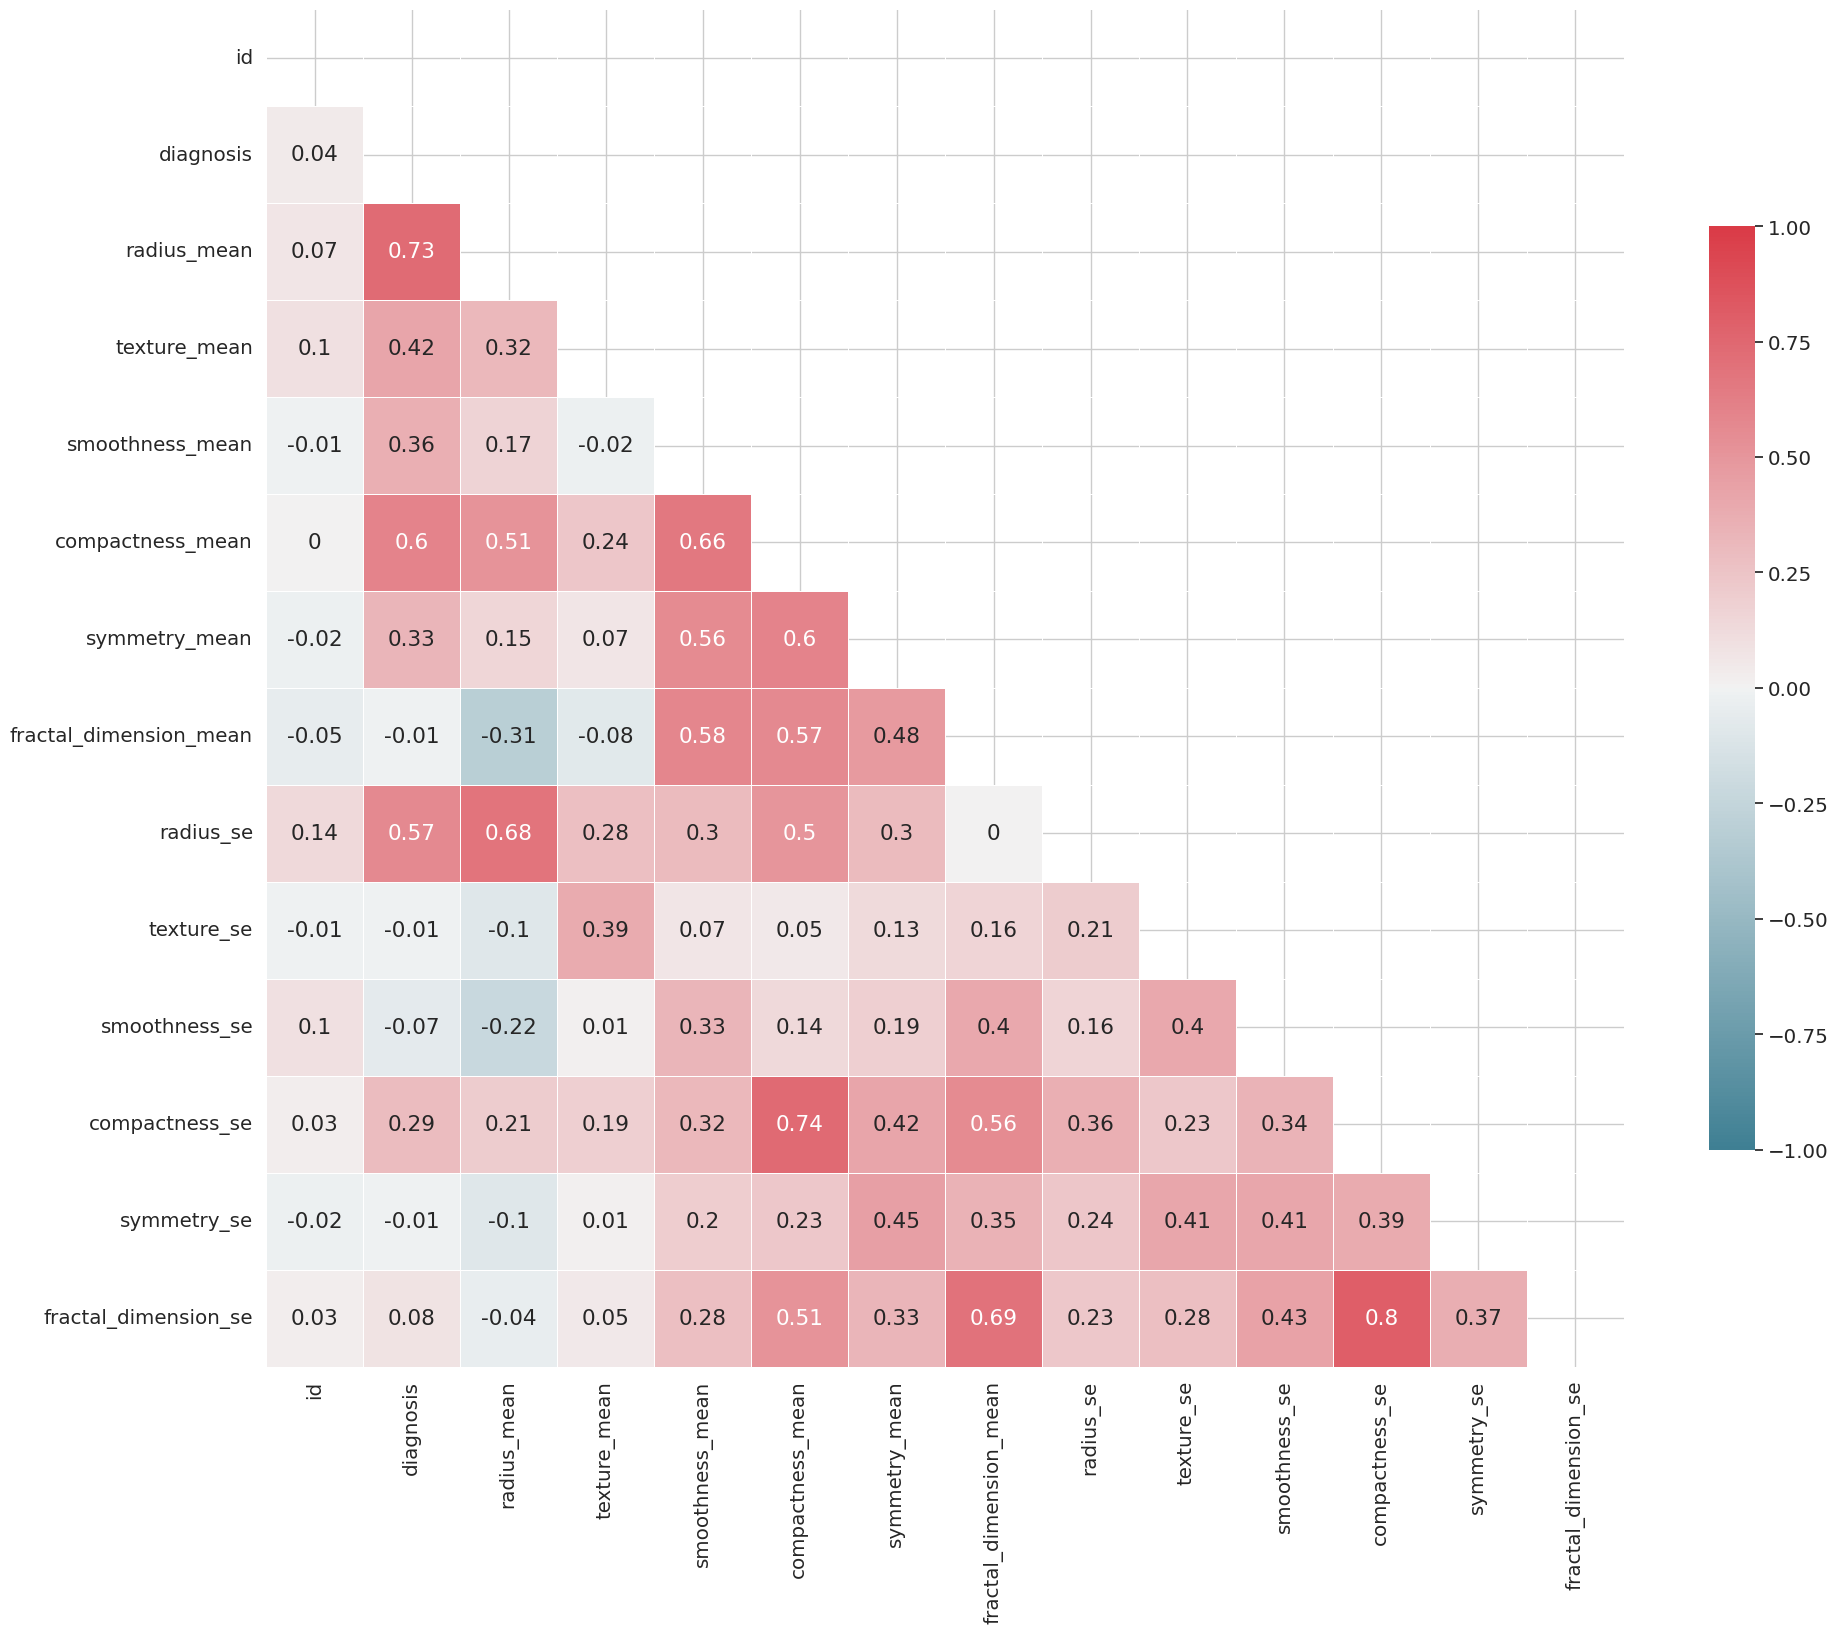

In [ ]:
from sklearn.preprocessing import LabelEncoder # convert categorical string to numeric

# Convert the 'diagnosis' column from string to numeric
le = LabelEncoder()          # instance of lablencoder
b_cancer['diagnosis'] = le.fit_transform(b_cancer['diagnosis'])

# Generate and visualize the correlation matrix
corr = b_cancer.corr().round(2)

# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool) # Use 'bool' instead of 'np.bool' # np.bool is no longer in numpy
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(20, 20)) #set of subplots with a size of 20x20 inches.

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True) #Annotates each cell with its correlation value.

plt.tight_layout() #Automatically adjusts the spacing between subplots to prevent overlapping text.


**1. b_cancer['diagnosis'] =** le.fit_transform(b_cancer['diagnosis']): Transforms the 'diagnosis' column from strings (e.g., 'M' for Malignant, 'B' for Benign) to numeric values (e.g., 1 for Malignant, 0 for Benign).

**2. b_cancer.corr():** Computes the pairwise correlation of columns in the DataFrame.
**.round(2):** Rounds the correlation values to two decimal places for easier reading.

**3.np.zeros_like(corr, dtype=bool):** Creates an array of the same shape as corr, filled with False.
**mask[np.triu_indices_from(mask)] = True:** Sets the values in the upper triangle of the mask to True, which means these parts will be hidden in the heatmap.

**4. sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0):** Draws the heatmap using the correlation matrix corr. The mask hides the upper triangle, cmap uses the custom colormap, and the color scale is set from -1 to 1, centered at 0.

**square=True:** Ensures that each cell in the heatmap is square-shaped.
linewidths=.5: Sets the width of the lines that divide the cells in the heatmap.

**cbar_kws={"shrink": .5}:** Shrinks the color bar to 50% of its original size.

In [ ]:
# first, drop all "worst" columns
cols = ['radius_worst',
        'texture_worst',
        'perimeter_worst',
        'area_worst',
        'smoothness_worst',
        'compactness_worst',
        'concavity_worst',
        'concave points_worst',
        'symmetry_worst',
        'fractal_dimension_worst']
b_cancer = b_cancer.drop(cols, axis=1)

# then, drop all columns related to the "perimeter" and "area" attributes
cols = ['perimeter_mean',
        'perimeter_se',
        'area_mean',
        'area_se']
b_cancer = b_cancer.drop(cols, axis=1)

# lastly, drop all columns related to the "concavity" and "concave points" attributes
cols = ['concavity_mean',
        'concavity_se',
        'concave points_mean',
        'concave points_se']
b_cancer = b_cancer.drop(cols, axis=1)

# verify remaining columns
b_cancer.columns

KeyError: "['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'] not found in axis"

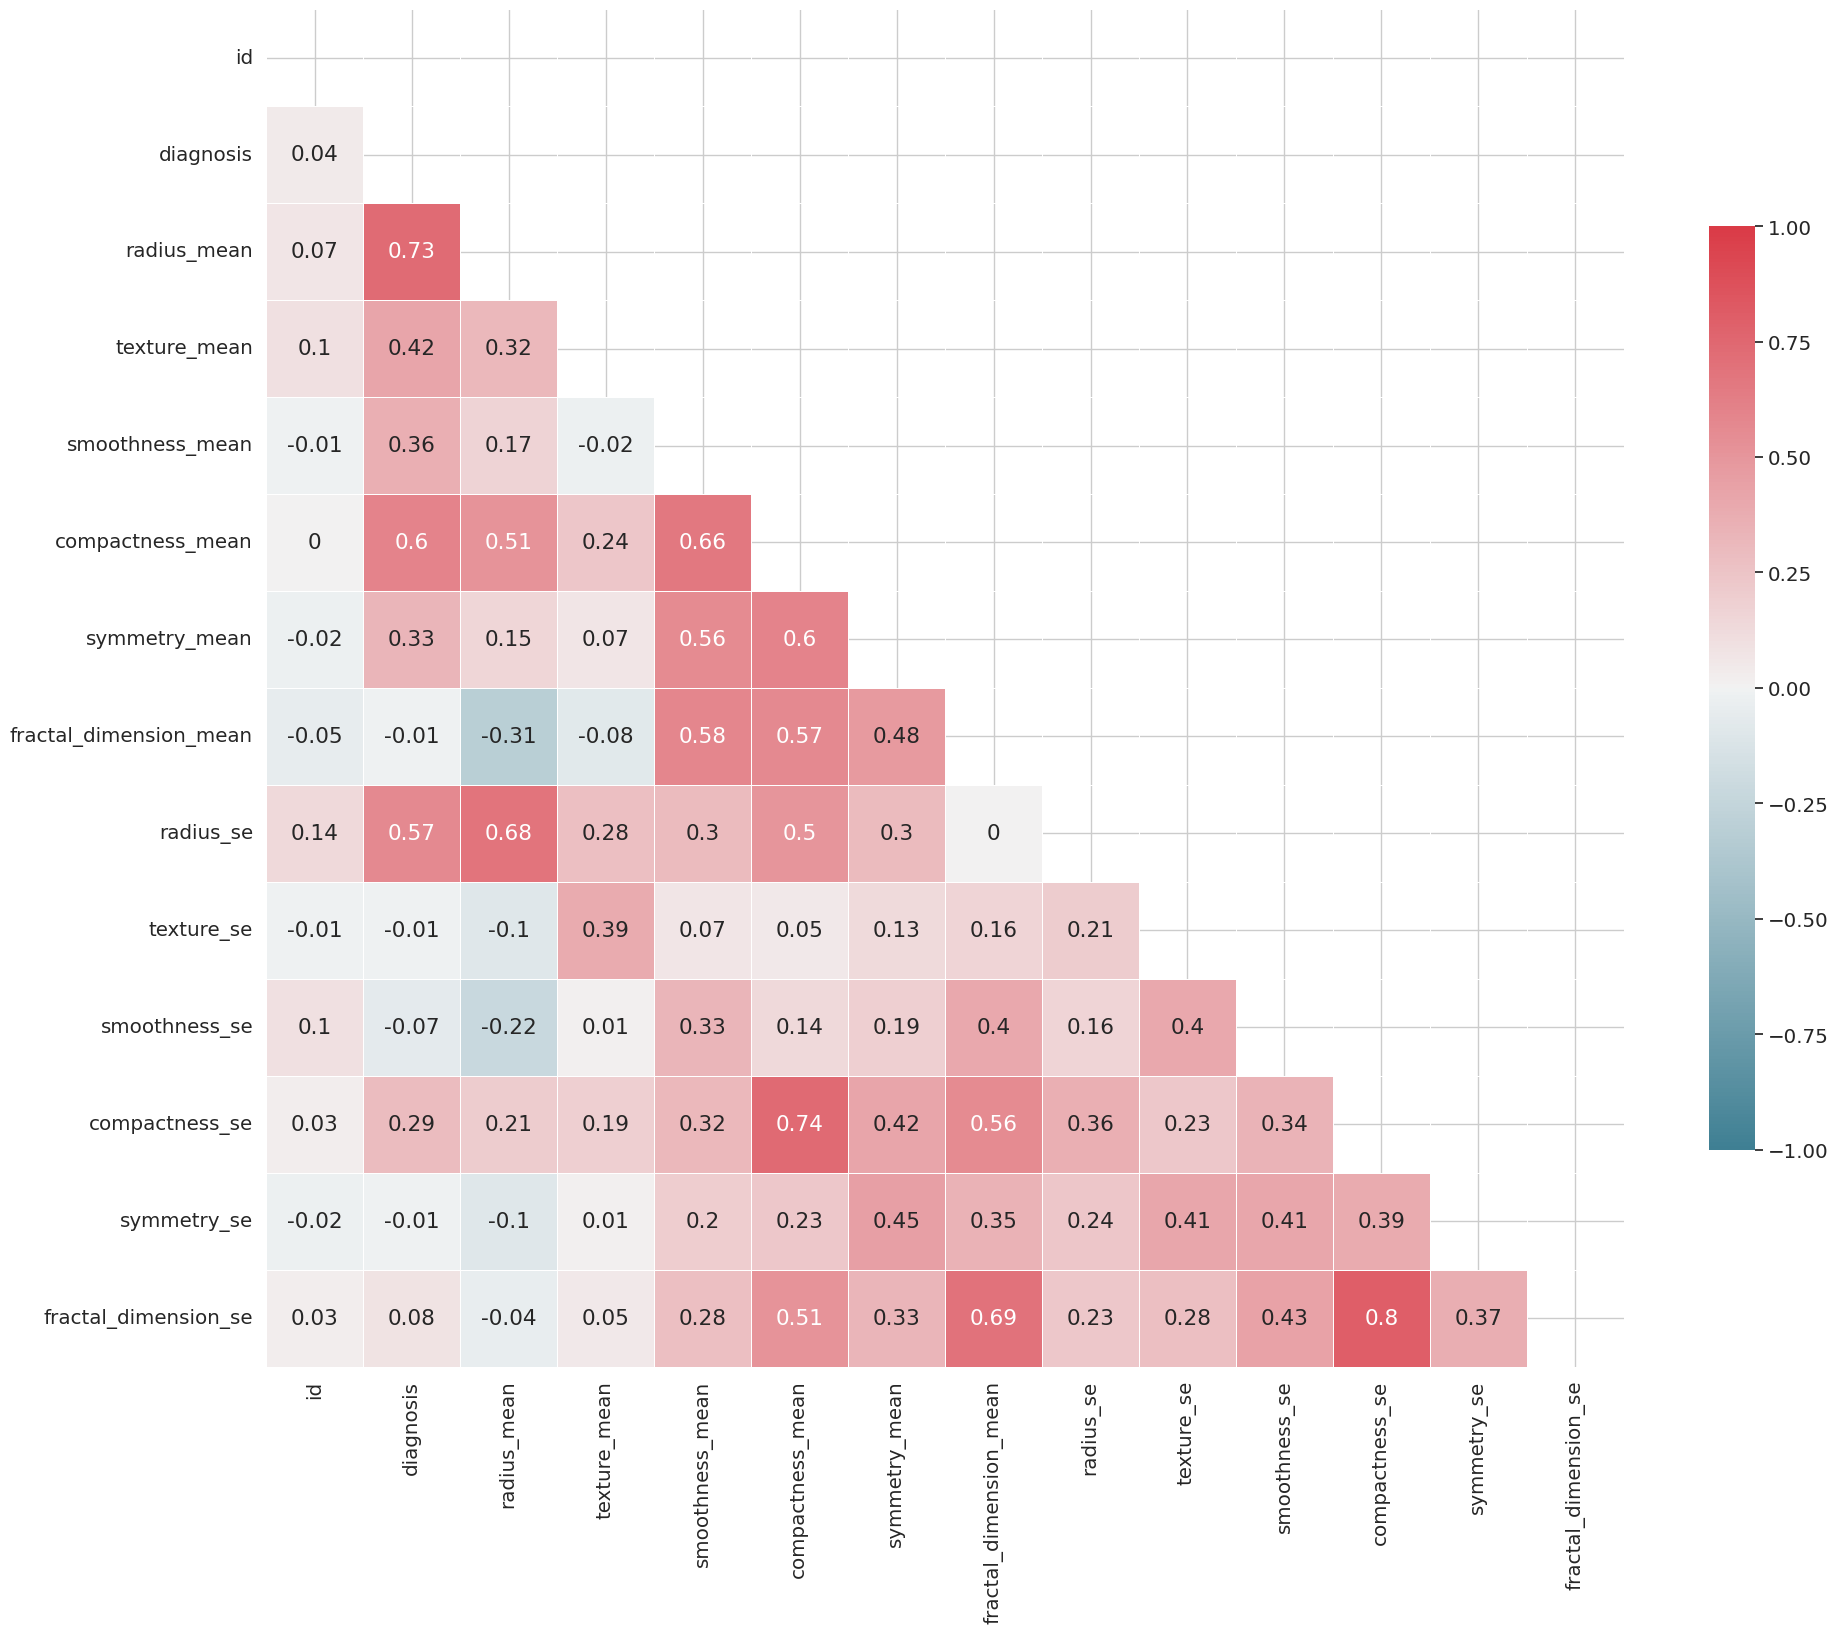

In [ ]:
# Draw the heatmap again, with the new correlation matrix
corr = b_cancer.corr().round(2)
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.tight_layout()

In [ ]:
# Split the data into training and testing sets
X = b_cancer
y = b_cancer['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

In [ ]:
# Create a string for the formula
cols = b_cancer.columns.drop('diagnosis')
formula = 'diagnosis ~ ' + ' + '.join(cols)
print(formula, '\n')

diagnosis ~ id + radius_mean + texture_mean + smoothness_mean + compactness_mean + symmetry_mean + fractal_dimension_mean + radius_se + texture_se + smoothness_se + compactness_se + symmetry_se + fractal_dimension_se 



In [ ]:

# Run the model and report the results
model = smf.glm(formula=formula, data=X_train, family=sm.families.Binomial())
logistic_fit = model.fit()

print(logistic_fit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              diagnosis   No. Observations:                  426
Model:                            GLM   Df Residuals:                      412
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -57.757
Date:                Mon, 26 Aug 2024   Deviance:                       115.51
Time:                        09:51:01   Pearson chi2:                     128.
No. Iterations:                     9   Pseudo R-squ. (CS):             0.6563
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -44

In [ ]:
# predict the test data and show the first 5 predictions
predictions = logistic_fit.predict(X_test)
predictions[1:6]


,0
16,0.974312
431,0.002132
453,0.056641
15,0.999907
275,0.998961


In [ ]:
# Note how the values are numerical.
# Convert these probabilities into nominal values and check the first 5 predictions again.
predictions_nominal = [ "M" if x < 0.6 else "B" for x in predictions]
predictions_nominal[1:6]

['B', 'M', 'M', 'B', 'B']

**It gives error:**



['M', 'B', 'B', 'M', 'B'] test data-0.2



In [ ]:
print(classification_report(y_test, predictions_nominal, digits=3))

cfm = confusion_matrix(y_test, predictions_nominal)

true_negative = cfm[0][0]
false_positive = cfm[0][1]
false_negative = cfm[1][0]
true_positive = cfm[1][1]

print('Confusion Matrix: \n', cfm, '\n')

print('True Negative:', true_negative)
print('False Positive:', false_positive)
print('False Negative:', false_negative)
print('True Positive:', true_positive)
print('Correct Predictions',
      round((true_negative + true_positive) / len(predictions_nominal) * 100, 1), '%')

ValueError: Mix of label input types (string and number)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Example data (ensure these are properly defined)
y_test = np.array(['B', 'B', 'M', 'M', 'B', 'M'])  # Replace with actual data
predictions_nominal = np.array(['B', 'B', 'M', 'M', 'B', 'B'])  # Replace with actual data

# Convert to strings if needed
y_test = y_test.astype(str)
predictions_nominal = predictions_nominal.astype(str)

# Generate classification report
print(classification_report(y_test, predictions_nominal, digits=3))

# Compute confusion matrix
cfm = confusion_matrix(y_test, predictions_nominal, labels=['B', 'M'])

# Extract values from confusion matrix
true_negative = cfm[0][0]
false_positive = cfm[0][1]
false_negative = cfm[1][0]
true_positive = cfm[1][1]

# Print confusion matrix and metrics
print('Confusion Matrix: \n', cfm, '\n')
print('True Negative:', true_negative)
print('False Positive:', false_positive)
print('False Negative:', false_negative)
print('True Positive:', true_positive)
print('Correct Predictions',
      round((true_negative + true_positive) / len(predictions_nominal) * 100, 1), '%')


              precision    recall  f1-score   support

           B      0.750     1.000     0.857         3
           M      1.000     0.667     0.800         3

    accuracy                          0.833         6
   macro avg      0.875     0.833     0.829         6
weighted avg      0.875     0.833     0.829         6

Confusion Matrix: 
 [[3 0]
 [1 2]] 

True Negative: 3
False Positive: 0
False Negative: 1
True Positive: 2
Correct Predictions 83.3 %
